<a href="https://colab.research.google.com/github/camaradaneto/hello-world/blob/master/plotting%20and%20grouping%20countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [0]:
data = pd.read_csv('3.01. Country clusters.csv')

In [7]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


<function matplotlib.pyplot.show>

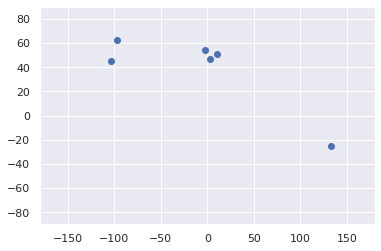

In [11]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [0]:
x = data.iloc[:,1:3]

In [36]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [0]:
kmeans = KMeans(3)

In [48]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 2, 2, 0], dtype=int32)

In [50]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,0


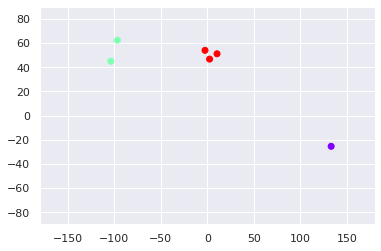

In [51]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()